#collect the dataset and importing the libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import naive_bayes
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.ensemble import GradientBoostingClassifier











# Read the dataset
Our dataset format is in .csv, we can read the dataset with the help of pandas.
Pandas 
 Python library used for working with data sets. It has functions for analyzing, cleaning, exploring, and manipulating data.
read_csv()
To read the dataset,In pandas we have a function called read_csv(), As the parameter we given the directory of the csv file, name as Loandata.csv



In [ ]:
data=pd.read_csv('Loandata.csv')
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


#Data preparation

##Handling missing values

finding shape

In [ ]:
data.shape

(367, 12)

finding datatype

In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


To check nullvalues

In [ ]:
data.isnull().any()

Loan_ID              False
Gender                True
Married              False
Dependents            True
Education            False
Self_Employed         True
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount            True
Loan_Amount_Term      True
Credit_History        True
Property_Area        False
dtype: bool

In [ ]:
data.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

we found than in our data there is* null values*, so we are going to handling missing values step

filling the values

In [ ]:
data['Gender']=data['Gender'].fillna(data['Gender'].mode()[0])
data['Dependents']=data['Dependents'].str.replace('+','')
data['Dependents']=data['Dependents'].fillna(data['Dependents'].mode()[0])
data['Self_Employed']=data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])
data['LoanAmount']=data['LoanAmount'].fillna(data['LoanAmount'].mode()[0])
data['Loan_Amount_Term']=data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0])
data['Credit_History']=data['Credit_History'].fillna(data['Credit_History'].mode()[0])
data.isnull().sum()


Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

##Handling categorical values

In [ ]:
#Encoding the 1.Gender(M=1,F=0)2.Married(yes=1,no=0)3.Education(G=1,NotG=0)4.Self_Employed(yes=1,no=0)5.property_Area(u=0,r=1,su=2)
data['Gender']=data['Gender'].replace({'Male':1,'Female':0})
data['Married']=data['Married'].replace({'Yes':1,'No':0})
data['Education']=data['Education'].replace({'Graduate':1,'Not Graduate':0})
data['Self_Employed']=data['Self_Employed'].replace({'Yes':1,'No':0})
data['Property_Area']=data['Property_Area'].replace({'Rural':1,'Urban':0,'Semiurban':2})
data.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,1,1,0,1,0,5720,0,110.0,360.0,1.0,0
1,LP001022,1,1,1,1,0,3076,1500,126.0,360.0,1.0,0
2,LP001031,1,1,2,1,0,5000,1800,208.0,360.0,1.0,0
3,LP001035,1,1,2,1,0,2340,2546,100.0,360.0,1.0,0
4,LP001051,1,0,0,0,0,3276,0,78.0,360.0,1.0,0
5,LP001054,1,1,0,0,1,2165,3422,152.0,360.0,1.0,0
6,LP001055,0,0,1,0,0,2226,0,59.0,360.0,1.0,2
7,LP001056,1,1,2,0,0,3881,0,147.0,360.0,0.0,1
8,LP001059,1,1,2,1,0,13633,0,280.0,240.0,1.0,0
9,LP001067,1,0,0,0,0,2400,2400,123.0,360.0,1.0,2


In [ ]:
data['Gender']=data['Gender'].astype('int64')
data['Married']=data['Married'].astype('int64')
data['Dependents']=data['Dependents'].astype('int64')
data['Self_Employed']=data['Self_Employed'].astype('int64')
data['ApplicantIncome']=data['ApplicantIncome'].astype('int64')
data['CoapplicantIncome']=data['CoapplicantIncome'].astype('int64')
data['LoanAmount']=data['LoanAmount'].astype('int64')
data['Loan_Amount_Term']=data['Loan_Amount_Term'].astype('int64')
data['Credit_History']=data['Credit_History'].astype('int64')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Loan_ID            367 non-null    object
 1   Gender             367 non-null    int64 
 2   Married            367 non-null    int64 
 3   Dependents         367 non-null    int64 
 4   Education          367 non-null    int64 
 5   Self_Employed      367 non-null    int64 
 6   ApplicantIncome    367 non-null    int64 
 7   CoapplicantIncome  367 non-null    int64 
 8   LoanAmount         367 non-null    int64 
 9   Loan_Amount_Term   367 non-null    int64 
 10  Credit_History     367 non-null    int64 
 11  Property_Area      367 non-null    int64 
dtypes: int64(11), object(1)
memory usage: 34.5+ KB


##Handling imbalance data

In [ ]:
data=data.drop('Loan_ID',axis=1)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Gender             367 non-null    int64
 1   Married            367 non-null    int64
 2   Dependents         367 non-null    int64
 3   Education          367 non-null    int64
 4   Self_Employed      367 non-null    int64
 5   ApplicantIncome    367 non-null    int64
 6   CoapplicantIncome  367 non-null    int64
 7   LoanAmount         367 non-null    int64
 8   Loan_Amount_Term   367 non-null    int64
 9   Credit_History     367 non-null    int64
 10  Property_Area      367 non-null    int64
dtypes: int64(11)
memory usage: 31.7 KB


#Exploratory Data Analysis

descriptive

In [ ]:
data.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
count,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000
mean,0.809264,0.634877,0.806540,0.771117,0.100817,4805.599455,1569.577657,136.321526,342.822888,0.839237,0.934605
std,0.393417,0.482122,1.065177,0.420687,0.301498,4910.685399,2334.232099,60.967295,64.658402,0.367814,0.833766
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,28.000000,6.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,1.000000,0.000000,2864.000000,0.000000,101.000000,360.000000,1.000000,0.000000
50%,1.000000,1.000000,0.000000,1.000000,0.000000,3786.000000,1025.000000,126.000000,360.000000,1.000000,1.000000
75%,1.000000,1.000000,2.000000,1.000000,0.000000,5060.000000,2430.500000,157.500000,360.000000,1.000000,2.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,72529.000000,24000.000000,550.000000,480.000000,1.000000,2.000000


univariate 

<Axes: xlabel='Credit_History', ylabel='Density'>

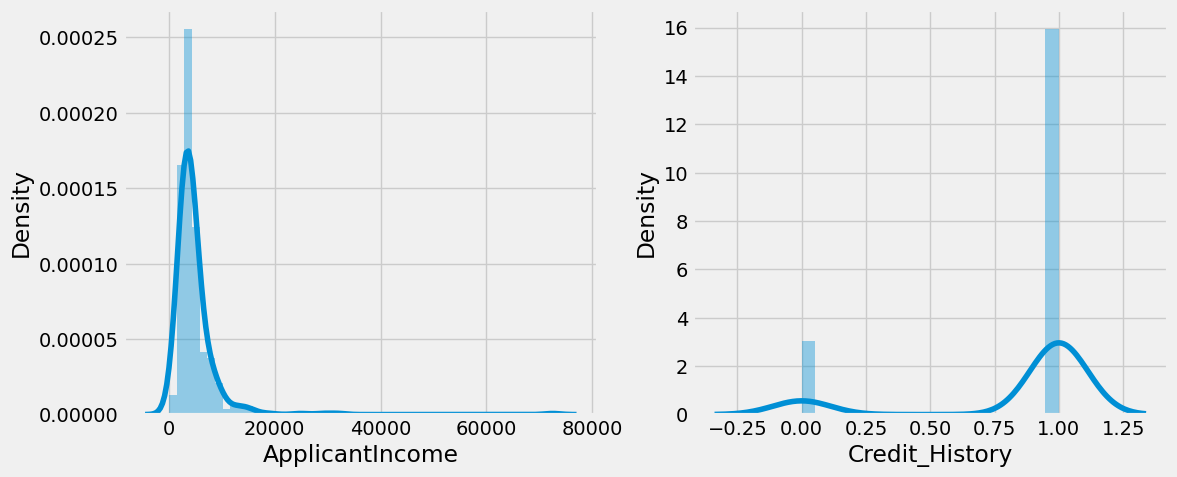

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(121)
sns.distplot(data['ApplicantIncome'])
plt.subplot(122)
sns.distplot(data['Credit_History'])


Bivariate

<Axes: xlabel='Education', ylabel='count'>

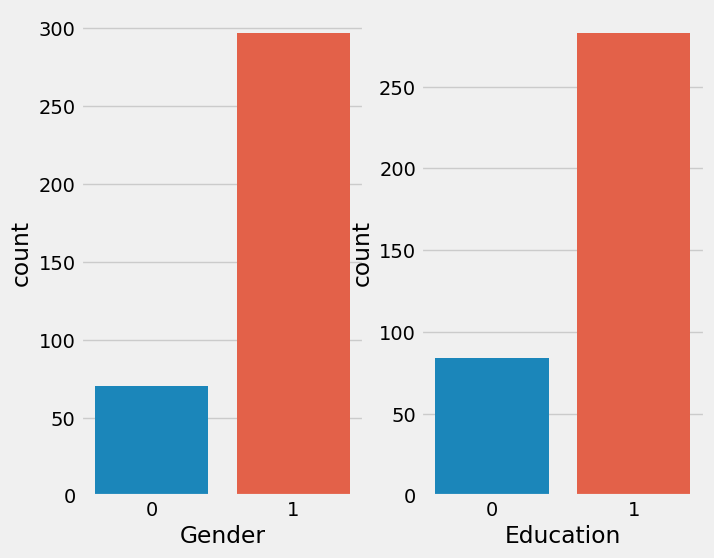

In [ ]:
plt.figure(figsize=(15,6))
plt.subplot(141)
sns.countplot(x=data['Gender'])
plt.subplot(142)
sns.countplot(x=data['Education'])


<Axes: xlabel='Property_Area', ylabel='count'>

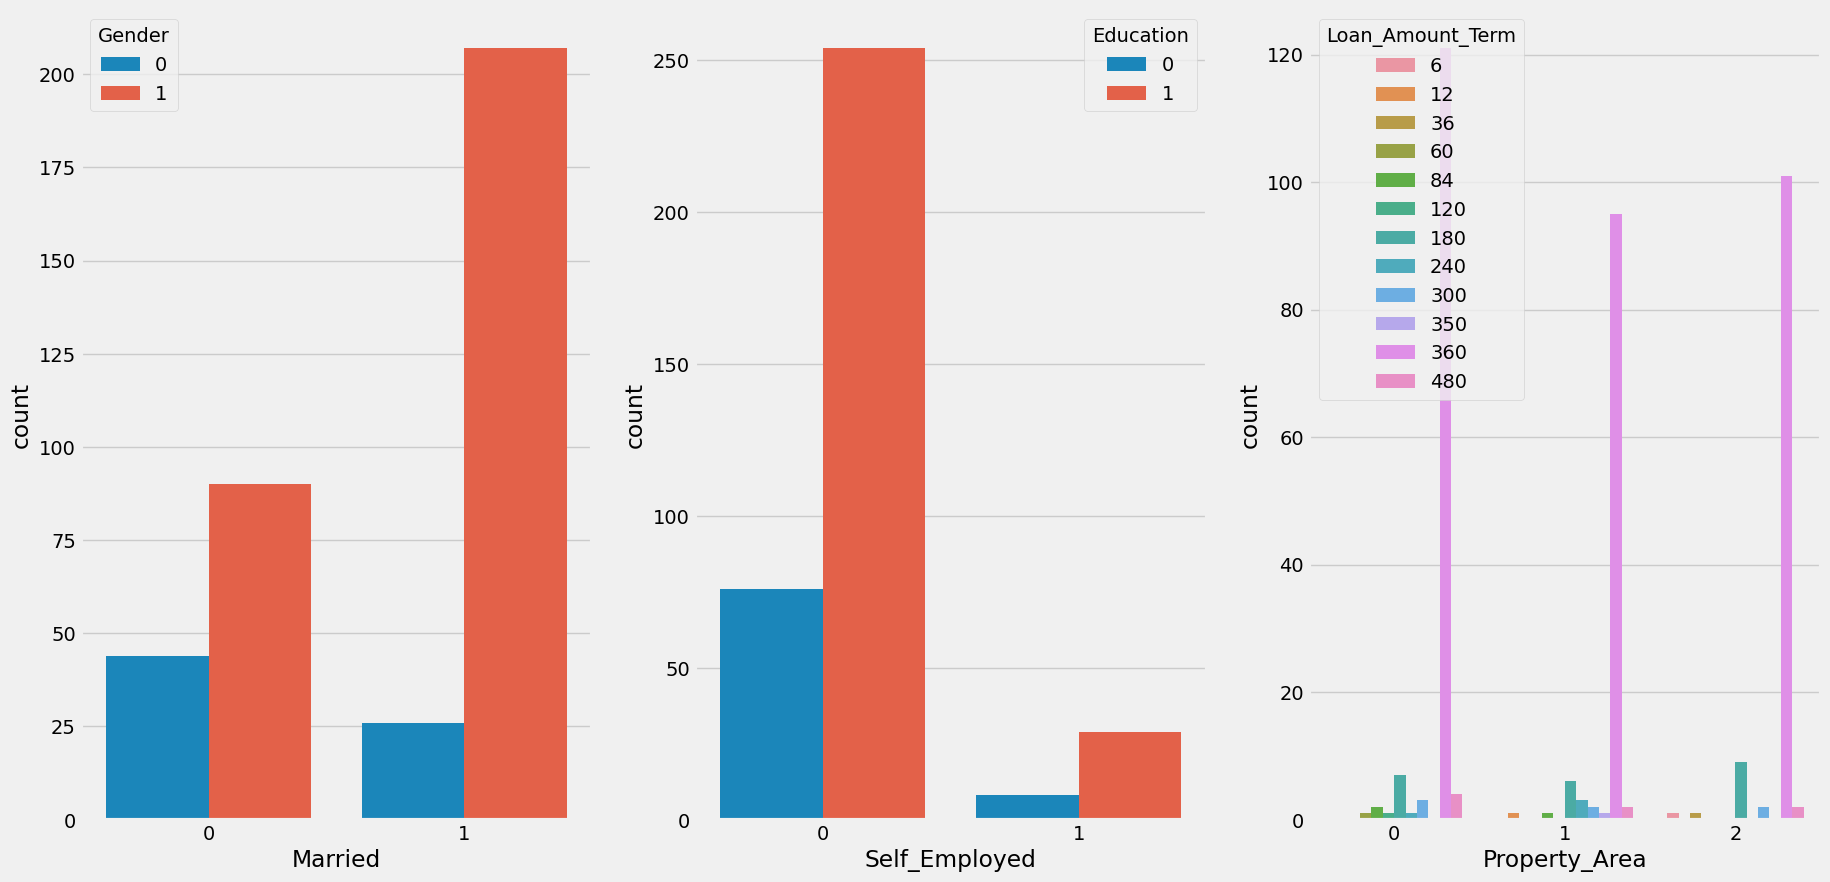

In [ ]:
plt.figure(figsize=(20,10))
plt.subplot(131)
sns.countplot(x=data['Married'],hue=data['Gender'])
plt.subplot(132)
sns.countplot(x=data['Self_Employed'], hue=data['Education'])
plt.subplot(133)
sns.countplot(x=data['Property_Area'], hue=data['Loan_Amount_Term'])



Multivariate analysis

<Axes: xlabel='Gender', ylabel='ApplicantIncome'>

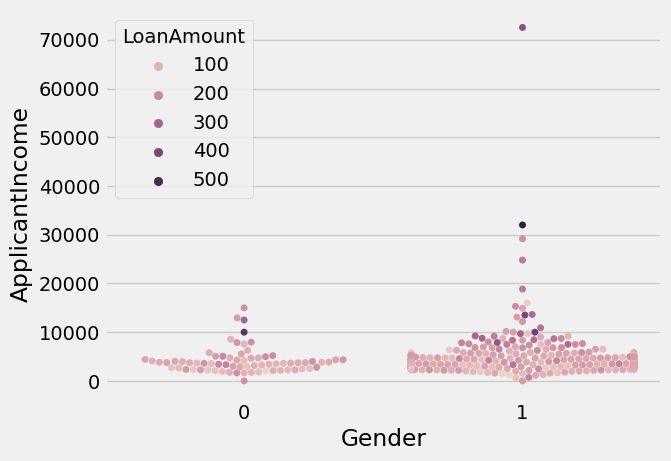

In [ ]:
sns.swarmplot(x=data['Gender'],y=data['ApplicantIncome'],hue=data['LoanAmount'])

#training the model 

##splitting into dep & indep

In [ ]:
x=data.drop('Credit_History',axis=1)
y=data['Credit_History']

In [ ]:
y.unique()

array([1, 0])

##splitting the data into train and test

*Multi linear regression*

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=10)

In [ ]:
ytrain.shape

(293,)

In [ ]:
xtrain.shape

(293, 10)

In [ ]:
ytest.shape

(74,)

In [ ]:
xtest.shape

(74, 10)

#decision tree model

In [ ]:
dt=DecisionTreeClassifier()
dt.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [ ]:
dt.predict(xtest)

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1])

In [ ]:
print(classification_report(ytest,dt.predict(xtest)))

              precision    recall  f1-score   support

           0       0.36      0.36      0.36        14
           1       0.85      0.85      0.85        60

    accuracy                           0.76        74
   macro avg       0.60      0.60      0.60        74
weighted avg       0.76      0.76      0.76        74



In [ ]:
 confusion_matrix(ytest,dt.predict(xtest))
 

array([[ 5,  9],
       [ 9, 51]])

In [ ]:
a=pd.DataFrame([np.array(ytest),dt.predict(xtest)]).T
a.columns=['Actual_value','predicted_value']
a

,Actual_value,predicted_value
0,1,0
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
69,1,1
70,0,0
71,1,1
72,1,1


In [ ]:
dt.predict([[0,1,3,1,1,6785,456,180,1,0]])

array([1])

#Random Forest

In [ ]:
rf=RandomForestClassifier()
rf.fit(xtrain,ytrain)

RandomForestClassifier()

In [ ]:
print(classification_report(ytest,rf.predict(xtest)))

              precision    recall  f1-score   support

           0       0.50      0.07      0.12        14
           1       0.82      0.98      0.89        60

    accuracy                           0.81        74
   macro avg       0.66      0.53      0.51        74
weighted avg       0.76      0.81      0.75        74



In [ ]:
confusion_matrix(ytest,rf.predict(xtest))

array([[ 1, 13],
       [ 1, 59]])

In [ ]:
rf.predict([[1,1,2,-1,1,5438,342,360,1,2]])

array([1])

#KNN

In [ ]:
knn=KNeighborsClassifier()

In [ ]:
knn.fit(xtrain,ytrain)

KNeighborsClassifier()

In [ ]:
print(classification_report(ytest,knn.predict(xtest)))

              precision    recall  f1-score   support

           0       0.50      0.07      0.12        14
           1       0.82      0.98      0.89        60

    accuracy                           0.81        74
   macro avg       0.66      0.53      0.51        74
weighted avg       0.76      0.81      0.75        74



In [ ]:
confusion_matrix(ytest,knn.predict(xtest))

array([[ 1, 13],
       [ 1, 59]])

#Xgboost

In [ ]:
xg=GradientBoostingClassifier()

In [ ]:
xg.fit(xtrain,ytrain)

GradientBoostingClassifier()

In [ ]:
print(classification_report(ytest,xg.predict(xtest)))

              precision    recall  f1-score   support

           0       1.00      0.07      0.13        14
           1       0.82      1.00      0.90        60

    accuracy                           0.82        74
   macro avg       0.91      0.54      0.52        74
weighted avg       0.86      0.82      0.76        74



In [ ]:
confusion_matrix(ytest,xg.predict(xtest))

array([[ 1, 13],
       [ 0, 60]])

#ANN

In [ ]:
classification=Sequential()

In [ ]:
classification.add(Dense(10,activation='relu'))
classification.add(Dense(64,activation='relu'))
classification.add(Dense(32,activation='relu'))
classification.add(Dense(1,activation='softmax'))

In [ ]:
classification.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
classification.fit(xtrain,ytrain,batch_size=2,epochs=30,validation_freq=1)

Epoch 1/30
147/147 [==============================] - 1s 2ms/step - loss: 24.2390 - accuracy: 0.8464
Epoch 2/30
147/147 [==============================] - 0s 2ms/step - loss: 12.9304 - accuracy: 0.8464
Epoch 3/30
147/147 [==============================] - 0s 2ms/step - loss: 10.5265 - accuracy: 0.8464
Epoch 4/30
147/147 [==============================] - 0s 2ms/step - loss: 9.7132 - accuracy: 0.8464
Epoch 5/30
147/147 [==============================] - 0s 2ms/step - loss: 5.2450 - accuracy: 0.8464
Epoch 6/30
147/147 [==============================] - 0s 3ms/step - loss: 5.6365 - accuracy: 0.8464
Epoch 7/30
147/147 [==============================] - 0s 3ms/step - loss: 7.7451 - accuracy: 0.8464
Epoch 8/30
147/147 [==============================] - 0s 3ms/step - loss: 4.4653 - accuracy: 0.8464
Epoch 9/30
147/147 [==============================] - 0s 3ms/step - loss: 5.5856 - accuracy: 0.8464
Epoch 10/30
147/147 [==============================] - 0s 3ms/step - loss: 2.3380 - accuracy: 0.8

#Testing the model

In [ ]:
x.head(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Property_Area
0,1,1,0,1,0,5720,0,110,360,0
1,1,1,1,1,0,3076,1500,126,360,0
2,1,1,2,1,0,5000,1800,208,360,0
3,1,1,2,1,0,2340,2546,100,360,0
4,1,0,0,0,0,3276,0,78,360,0
5,1,1,0,0,1,2165,3422,152,360,0
6,0,0,1,0,0,2226,0,59,360,2
7,1,1,2,0,0,3881,0,147,360,1
8,1,1,2,1,0,13633,0,280,240,0
9,1,0,0,0,0,2400,2400,123,360,2


In [ ]:
dt.predict([[1,1,2,0,0,3881,0,147,360,1]])

array([0])

In [ ]:
rf.predict([[1,1,2,0,0,3881,0,147,360,1]])

array([0])

In [ ]:
knn.predict([[1,0,2,1,1,6578,567,360,1,1]])

array([1])

In [ ]:
xg.predict([[1,0,2,1,1,6578,567,360,1,1]])

array([0])

#Model Deployment

In [ ]:
import pickle

In [ ]:
pickle.dump(dt,open('loandt.pkl','wb'))